### Data Exploration of the Anime Dataset

In this notebook, we explore the [Anime Dataset 2023](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?select=users-score-2023.csv) to gain insights and prepare for training a recommendation model. The key objectives are:

- Understand the structure and content of the dataset.
- Experiment with different analyses to identify patterns or trends.
- Assess whether other models can be applied to this dataset.
  
The final goal is to use these insights to train a recommendation model, which will be done in the [Model Notebook](./model.ipynb).


In [1]:
# download the data from the kaggle api
!python download.py

/bin/bash: line 1: python: command not found


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from typing import Tuple, Dict
import os

# Dataset Description

This dataset provides extensive information on anime series and is sourced from the popular website MyAnimeList. It includes a wide variety of features related to anime titles, such as rankings, user ratings, genres, and other metadata that are essential for exploring trends and analyzing patterns in anime consumption.

For more details and access to the dataset, please visit the following link: [MyAnimeList Dataset on Kaggle](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset).

Please consider supporting the original author by acknowledging their work and adhering to any usage guidelines outlined in the dataset's licensing agreement.


## Content

### anime-dataset-2023.csv

- **anime_id**: Unique ID for each anime.
- **Name**: The name of the anime in its original language.
- **English name**: The English name of the anime.
- **Other name**: Native name or title of the anime (can be in Japanese, Chinese, or Korean).
- **Score**: The score or rating given to the anime.
- **Genres**: The genres of the anime, separated by commas.
- **Synopsis**: A brief description or summary of the anime's plot.
- **Type**: The type of the anime (e.g., TV series, movie, OVA, etc.).
- **Episodes**: The number of episodes in the anime.
- **Aired**: The dates when the anime was aired.
- **Premiered**: The season and year when the anime premiered.
- **Status**: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
- **Producers**: The production companies or producers of the anime.
- **Licensors**: The licensors of the anime (e.g., streaming platforms).
- **Studios**: The animation studios that worked on the anime.
- **Source**: The source material of the anime (e.g., manga, light novel, original).
- **Duration**: The duration of each episode.
- **Rating**: The age rating of the anime.
- **Rank**: The rank of the anime based on popularity or other criteria.
- **Popularity**: The popularity rank of the anime.
- **Favorites**: The number of times the anime was marked as a favorite by users.
- **Scored By**: The number of users who scored the anime.
- **Members**: The number of members who have added the anime to their list on the platform.
- **Image URL**: The URL of the anime's image or poster.

### users-details-2023.csv

- **Mal ID**: Unique ID for each user.
- **Username**: The username of the user.
- **Gender**: The gender of the user.
- **Birthday**: The birthday of the user (in ISO format).
- **Location**: The location or country of the user.
- **Joined**: The date when the user joined the platform (in ISO format).
- **Days Watched**: The total number of days the user has spent watching anime.
- **Mean Score**: The average score given by the user to the anime they have watched.
- **Watching**: The number of anime currently being watched by the user.
- **Completed**: The number of anime completed by the user.
- **On Hold**: The number of anime on hold by the user.
- **Dropped**: The number of anime dropped by the user.
- **Plan to Watch**: The number of anime the user plans to watch in the future.
- **Total Entries**: The total number of anime entries in the user's list.
- **Rewatched**: The number of anime rewatched by the user.
- **Episodes Watched**: The total number of episodes watched by the user.

### users-score-2023.csv

- **user_id**: Unique ID for each user.
- **Username**: The username of the user.
- **anime_id**: Unique ID for each anime.
- **Anime Title**: The title of the anime.
- **rating**: The rating given by the user to the anime.

### General questions

1) How does the demograpic of the anime community look like
2) Show the distribution of gender in the dataset
3) What genres are the most popular
4) Does the number of episodes influence if an anime is droppped
5) Which country has the highest user engagement
6)  How do anime preferences differ by location? Are there specific genres or titles that are more popular in certain countries or regions?

In [3]:
df_anime  = pd.read_csv("./data/anime-dataset-2023.csv")
df_anime.head(3)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


In [4]:
df_user_details = pd.read_csv("./data/users-details-2023.csv")
df_user_details.head(3)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0


In [5]:
df_user_score = pd.read_csv("./data/users-score-2023.csv")
df_user_score.head(3)

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5


## Demographic Overview

The demographic data available in the dataset is limited due to a significant number of users not providing their birthdate information. As a result, the insights derived from this data may not be fully representative of the broader anime fanbase. This limitation should be considered when interpreting the results.

In [6]:
'''
The code snippet below calculates the percentage of users who have provided their birthdate 
and the percentage of missing values (NaN) in the dataset.
It also shows the date format used
'''
birthdays = df_user_details[["Birthday"]].dropna()
total = len(df_user_details["Birthday"])
num_birthdays = len(df_user_details["Birthday"].dropna())
num_nan = total - num_birthdays
ratio_factor = 100 / total

print(f"{(num_birthdays * ratio_factor):.3f} % of the users have given their birthday")
print(f"{(num_nan * ratio_factor):.3f} % of the dataset is NaN")
birthdays

22.982 % of the users have given their birthday
77.018 % of the dataset is NaN


,Birthday
0,1985-03-04T00:00:00+00:00
5,1988-01-25T00:00:00+00:00
6,1988-02-22T00:00:00+00:00
11,1990-02-09T00:00:00+00:00
12,1983-11-09T00:00:00+00:00
...,...
731266,1994-08-20T00:00:00+00:00
731269,1996-12-07T00:00:00+00:00
731270,1991-12-11T00:00:00+00:00
731280,1997-12-24T00:00:00+00:00


The dataset contains numerous errors in birth years, as evidenced by unrealistic ages. Specifically, some records suggest ages that are either negative, indicating birth years in the future, or exceedingly high beyond typical human lifespans.

In [7]:

'''
The code snippet below preprocesses the given birthday into years and months.
We should keep in mind that the data is from 2023 so we calculate the age until this year.
'''
birthdays_data = birthdays.to_numpy().flatten()
test_birth = birthdays_data[0]
data = [date.split("-") for date in birthdays_data]

# extract the year from the birthday
birth_years = np.array([int(year[0]) for year in data])
unique_birth_years = np.unique(birth_years)
print(unique_birth_years, "\n")

# extract the birth month from
birth_months = np.array([int(month[1]) for month in data])
unique_birth_months = np.unique(birth_months)
print(unique_birth_months, "\n")


[   1   97  666 1000 1321 1337 1712 1730 1800 1851 1886 1900 1930 1931
 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024 2100] 

[ 1  2  3  4  5  6  7  8  9 10 11 12] 



In [8]:
'''
Convert the birth year into age then filter between ages of 10 - 100
'''
ages = 2023 - birth_years
ages = ages[(ages >= 10) & (ages <= 100)]
num_valid_ages = ages.shape[0]
num_total_given = birth_years.shape[0]
print(ages)
print(f"The filterd list contains {num_valid_ages} valid ages")
print(f"The original size if the list is {num_total_given}")
print(f"The number of errors are {num_total_given - num_valid_ages}")

[38 35 35 ... 32 26 30]
The filterd list contains 167944 valid ages
The original size if the list is 168068
The number of errors are 124


### Analysis of Age Distribution in the Fanbase
The discrete age distribution chart indicates that the age distribution of the fanbase approximates a normal distribution, characterized by a clear central peak and symmetric tapering at both ends. The bulk of the fanbase ages are concentrated within the 20-40 year range, suggesting that this demographic is the most represented within the group.

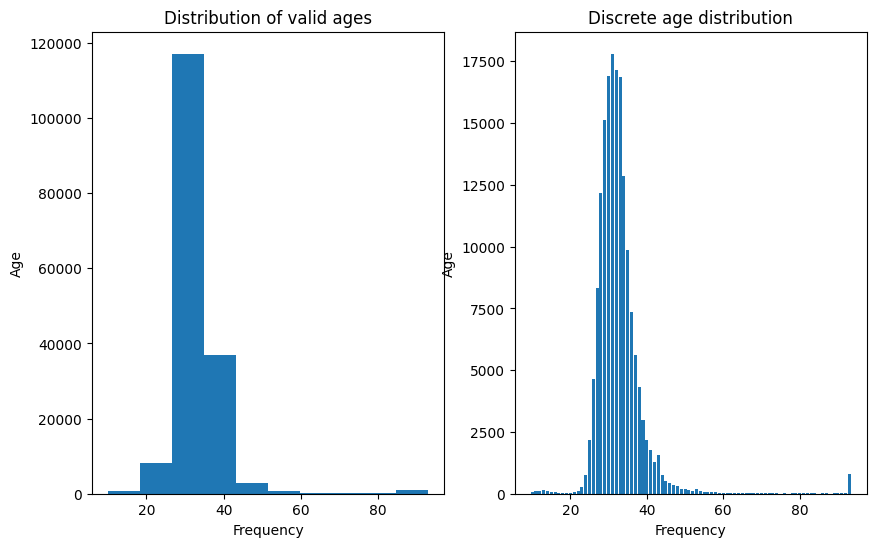

In [9]:
# plot the distribution of the valid ages

fig, axes = plt.subplots(ncols=2, figsize=(10, 6))

# display distrubution with histogramm
axes[0].set_title("Distribution of valid ages")
axes[0].set_ylabel("Age")
axes[0].set_xlabel("Frequency")
axes[0].hist(ages)

# display discrete ages
unique_ages, counts = np.unique(ages, return_counts=True)
axes[1].set_title("Discrete age distribution")
axes[1].set_ylabel("Age")
axes[1].set_xlabel("Frequency")
axes[1].bar(unique_ages, counts)

plt.show();

## MAL Fanbase Gender Distribution Report

### Executive Summary

This report analyzes the gender distribution of the MAL fanbase. It notes significant data gaps, with over 69% of gender data missing. The available data shows a majority of male participants among those who reported.

### Data Summary

- **Male**: 126,984
- **Female**: 96,485
- **Non-Binary**: 914

Only 30.683% of the data entries include gender information.

### Key Findings

1. **Higher Male Reporting**: Males are more prevalent in the dataset, accounting for 56.6% of the given responses.
2. **Significant Missing Data**: The high percentage of missing data limits the ability to make conclusive statements about the entire fanbase.

### Conclusion

The analysis indicates a male predominance among the reporting users. However, the large amount of missing data suggests that these findings may not fully represent the entire fanbase. Enhanced data collection efforts are recommended for more accurate insights.


In [10]:
gender_total = df_user_details[["Gender"]]
gender_given = gender_total.dropna()
num_given_gender = gender_total.dropna().shape[0]
gender_ratio = 100 / gender_total.shape[0]
print(f"This dataset contains {(gender_ratio * num_given_gender):.3f} % given values")
print(f"{(100 - gender_ratio * num_given_gender):.3f} % of the data are null values")

This dataset contains 30.683 % given values
69.317 % of the data are null values


Gender    
Male          126984
Female         96485
Non-Binary       914
Name: count, dtype: int64


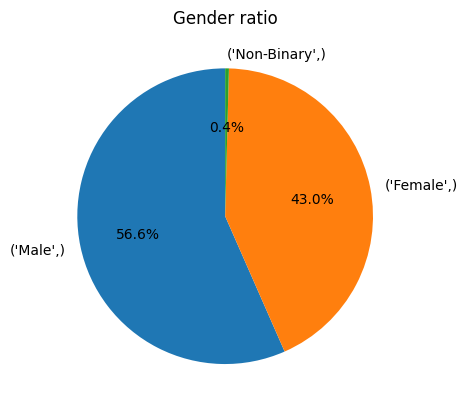

In [11]:
# for display convert male to 1 and female to 0
gender_counts = gender_given.value_counts()
print(gender_counts)

labels = gender_counts.index
sizes = gender_counts.values
plt.title("Gender ratio")
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
plt.show();


## Genre Popularity

### Key Findings
- High Performance: Genres like Award Winning and Mystery have the highest average scores, indicating strong popularity or higher quality content in these categories.
- Adult Content Popularity: Romance, Ecchi, and Hentai genres also scored relatively high, suggesting a significant market segment interested in adult themes.
- Genre Distribution: The diversity in score distribution across genres such as Action, Supernatural, and Drama shows varied audience preferences.

In [12]:
# preprocess the data
genre_rating = df_anime[["Genres", "Score"]]
genre_rating.loc[:, "Score"] = genre_rating["Score"].apply(lambda x: 0 if x == "UNKNOWN" else float(x))
genre_rating.loc[:, "Genres"] = genre_rating["Genres"].apply(lambda x: x.replace(" ", ""))
genre_rating.loc[:, "Genres"] = genre_rating["Genres"].apply(lambda x: x.split(","))
print(genre_rating.head(5))

                                   Genres Score
0          [Action, AwardWinning, Sci-Fi]  8.75
1                        [Action, Sci-Fi]  8.38
2             [Action, Adventure, Sci-Fi]  8.22
3  [Action, Drama, Mystery, Supernatural]  7.25
4      [Adventure, Fantasy, Supernatural]  6.94


In [13]:
# extract each genre
genre_rating = genre_rating.explode("Genres")
genre_rating["Count"] = 1
print("\n", genre_rating.head(5))


          Genres Score  Count
0        Action  8.75      1
0  AwardWinning  8.75      1
0        Sci-Fi  8.75      1
1        Action  8.38      1
1        Sci-Fi  8.38      1


In [14]:
# aggregate and take the average
grouped_genres = genre_rating.groupby("Genres").agg({
    "Score": "sum",
    "Count" : "sum"
}).reset_index()

grouped_genres["Avg_Score"] = grouped_genres["Score"] / grouped_genres["Count"]
grouped_genres = grouped_genres.sort_values("Avg_Score")
unique_genres = np.unique(grouped_genres["Genres"])
print(grouped_genres.head(5), "\n")
print(unique_genres)

         Genres     Score  Count Avg_Score
21      UNKNOWN  10265.43   4929   2.08266
2    AvantGarde   2407.36    804  2.994229
9       Fantasy  21691.78   5306  4.088161
17  SliceofLife   7667.19   1755  4.368769
5        Comedy  33071.41   7142  4.630553 

['Action' 'Adventure' 'AvantGarde' 'AwardWinning' 'BoysLove' 'Comedy'
 'Drama' 'Ecchi' 'Erotica' 'Fantasy' 'GirlsLove' 'Gourmet' 'Hentai'
 'Horror' 'Mystery' 'Romance' 'Sci-Fi' 'SliceofLife' 'Sports'
 'Supernatural' 'Suspense' 'UNKNOWN']


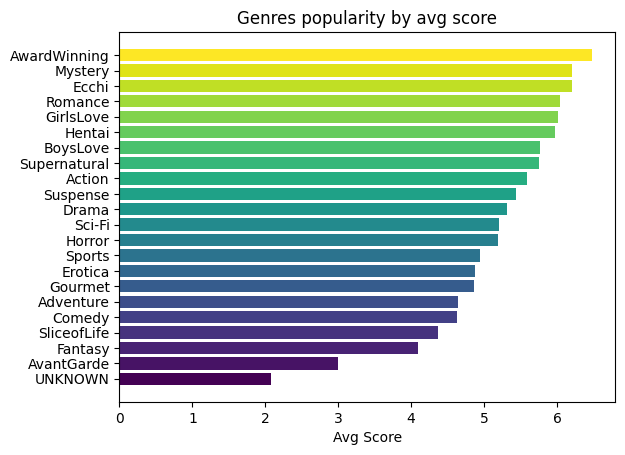

In [15]:
# display the different genres
labels = grouped_genres["Genres"]
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
plt.title("Genres popularity by avg score")
plt.barh(labels, grouped_genres["Avg_Score"], color=colors)
plt.xlabel("Avg Score")
plt.show();

### Recommender specific

1) What average rating does each user give
2) Which genres do users rate the highest on average?
3)  Are there any biases in the ratings? For example, do users tend to give higher ratings to more popular or well-known anime?
4) How sparse is the user / item matrix

## Average user rating distribution

The data consists of individual user ratings. I aggregated these ratings at the user level to compute the average rating per user. The distribution of these average ratings was then visualized using a histogram.

The histogram of average ratings shows a clear skew towards higher ratings, with most ratings clustered between 7 and 9. Here are the detailed findings:

- Central Tendency: The mode of the distribution is in the 7-9 range, suggesting that users tend to rate content favorably.
- Skewness: The distribution exhibits positive skewness, indicating a significant number of users who rate content even more favorably, with average ratings stretching towards 10.

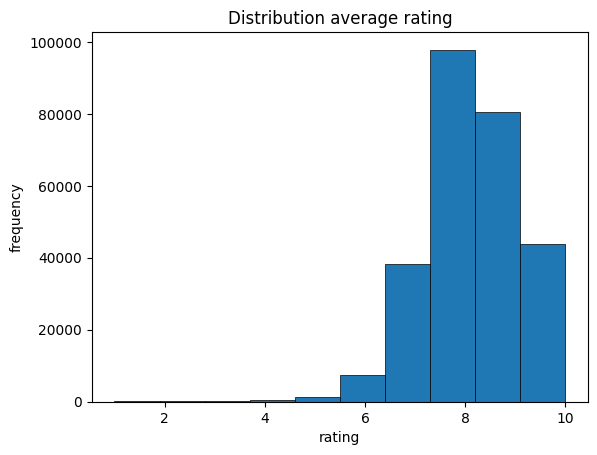

: 

In [16]:
# get the average rating of each user
user_score = df_user_score[["user_id", "rating"]].copy()
user_score["count"] = 1
user_score_avg = user_score.groupby("user_id").agg({
    "rating": "sum",
    "count" : "sum"
})

user_score_avg["avg_rating"] = user_score_avg["rating"] / user_score_avg["count"]

# plotting
plt.title("Distribution average rating")
plt.xlabel("rating")
plt.ylabel("frequency")
plt.hist(user_score_avg["avg_rating"], edgecolor="black", linewidth=0.5)
plt.show();

In [17]:
sample = df_user_score.sample(4)

# mapping row number to user_id
def create_mapper(data: np.ndarray) -> dict:
    row_counts = np.arange(len(data))
    mapper = {}
    for i in row_counts:
        mapper[data[i]] = i
    
    return mapper

def create_rating_matrix(df: pd.DataFrame) -> Tuple[Dict[int, int], Dict[int, int], np.ndarray]:

    anime_id = np.unique(df["anime_id"])
    user_id = np.unique(df["user_id"])

    user_to_row = create_mapper(user_id)
    anime_to_col = create_mapper(anime_id)

    num_users = len(user_to_row)
    num_animes = len(anime_to_col)
    matrix = [[0] * num_animes for _ in range(num_users)]
    matrix = np.array(matrix)

    for user, i in user_to_row.items():
        for anime, j in anime_to_col.items():
            rating = df[(df["user_id"] == user) & (df["anime_id"] == anime)]["rating"].to_numpy()

            if(len(rating) > 0):
                matrix[i][j] = rating[0]

    return user_to_row, anime_to_col, matrix

if(not os.path.exists("./rating_matrix.npz")):
    row_to_user, col_to_anime, rating_matrix = create_rating_matrix(df_user_score)
    np.savez("rating_matrix.npz", rating_matrix=rating_matrix, row_to_user=row_to_user, col_to_anime=col_to_anime)
    print(rating_matrix)